In [1]:
# Calculates error bars of EW based on scatter in measured EWs from same star
# in narrow range of phases

In [10]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
stem = '/Users/bandari/Documents/git.repos/rrlfe/'

In [12]:
# the phases
file_name_phases = stem + 'notebooks_for_development/data/phases_all_master_no_repeat_fits.csv'

# the EWs as measured by Robospect
file_name_robo = stem + 'rrlfe_io_20220803_01_mcd/ew_products/restacked_ew_info_good_only_w_net_balmer_errors.csv'

In [13]:
df_phases = pd.read_csv(file_name_phases)
df_robo = pd.read_csv(file_name_robo)

In [14]:
# make new identifier to match the right files

df_phases['string_identifier'] = df_phases['spec_file'].str.split('.', expand=True)[0]
df_robo['string_identifier'] = df_robo['orig_spec_file_name'].str.split('.', expand=True)[0]

In [16]:
# merge

df_merged = df_robo.merge(df_phases, on = 'string_identifier', how='left')

In [17]:
# restrict to VX Her
rows_vx_her = df_merged.loc[df_merged['star_match'] == 'VX Her']

In [21]:
del_phase = 0.25 # fraction of phase by which to bin spectra

balmer_ew_std_array = list()
balmer_mean_err_robo_array = list()
caiik_ew_std_array = list()
caiik_mean_err_robo_array = list()

for segment_phase in range(0,math.ceil(1./del_phase)):
    
    rows_these = rows_vx_her[np.logical_and(rows_vx_her['my_phase'] > segment_phase*del_phase, rows_vx_her['my_phase'] < (segment_phase + 1)*del_phase)]
    
    #print(segment_phase*del_phase)
    #print((segment_phase + 1)*del_phase)
    #print(len(rows_these))
    print(np.std(rows_these['EW_Balmer']))
    print(np.mean(rows_these['err_EW_Balmer_from_Robo']))
    print(np.std(rows_these['EW_CaIIK']))
    print(np.mean(rows_these['err_EW_CaIIK_from_robo']))
    
    balmer_ew_std_array.append(np.std(rows_these['EW_Balmer']))
    balmer_mean_err_robo_array.append(np.mean(rows_these['err_EW_Balmer_from_Robo']))
    caiik_ew_std_array.append(np.std(rows_these['EW_CaIIK']))
    caiik_mean_err_robo_array.append(np.mean(rows_these['err_EW_CaIIK_from_robo']))
    
    print('----')
    

1.0303629402549719
2.363121823009508
0.8035195820441214
0.502018625
----
0.7868695335227993
2.4091047024521908
0.458773501905399
0.7328907777777778
----
0.4179233913760819
2.3546283142018867
0.21595067770475482
1.1775334285714287
----
0.14467250000000043
2.9160082728844996
0.21671000000000007
0.25924699999999995
----


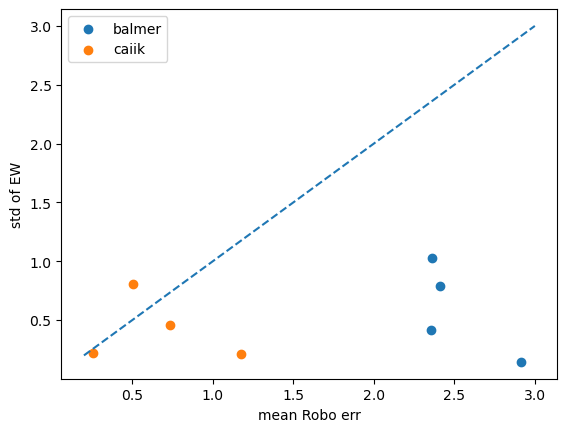

In [24]:
plt.scatter(balmer_mean_err_robo_array,balmer_ew_std_array,label='balmer')
plt.scatter(caiik_mean_err_robo_array,caiik_ew_std_array,label='caiik')
plt.plot([0.2,3.0],[0.2,3.0],linestyle='--')
plt.xlabel('mean Robo err')
plt.ylabel('std of EW')
plt.legend()
plt.show()

In [28]:
soln = np.polyfit(x=np.concatenate((balmer_mean_err_robo_array,caiik_mean_err_robo_array)), 
                  y=np.concatenate((caiik_mean_err_robo_array,caiik_ew_std_array)), deg=1)

In [29]:
soln

array([0.07905996, 0.42017894])